In [1]:
import os
import cv2
import numpy as np

#for splitting the data into train/test sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tesor flow keras cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#plot images
import matplotlib.pyplot as plt

In [2]:
folder_dir="C:\\Users\\Biancaa. R\\rpi_disease\\pest_classification\\images"

In [3]:
data=[]
label=[]
SIZE=128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg") or file.endswith("png"):
            label.append(folder) 
            #for saving what all classes we are having
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue


In [4]:
#data is saved as unsigned 8 bit integer
'''uint: This is short for "unsigned integer." "Unsigned" means that the data type represents only non-negative numbers (zero and positive values). In contrast, a signed integer can represent both positive and negative numbers.

"8": This refers to the number of bits used to store the value. With 8 bits, you can represent 2^8 = 256 different values, which is why uint8 can represent values from 0 to 255.'''
data[0]

array([[[183, 201, 221],
        [182, 200, 220],
        [183, 201, 221],
        ...,
        [157, 177, 201],
        [158, 178, 202],
        [158, 178, 202]],

       [[183, 201, 221],
        [182, 200, 220],
        [183, 201, 221],
        ...,
        [157, 177, 201],
        [158, 178, 202],
        [158, 178, 202]],

       [[183, 201, 221],
        [182, 200, 220],
        [183, 201, 221],
        ...,
        [158, 178, 202],
        [158, 178, 202],
        [158, 178, 202]],

       ...,

       [[170, 187, 207],
        [170, 187, 207],
        [170, 187, 207],
        ...,
        [144, 165, 192],
        [145, 166, 193],
        [145, 166, 193]],

       [[170, 187, 207],
        [170, 187, 207],
        [170, 187, 207],
        ...,
        [144, 165, 192],
        [144, 165, 192],
        [144, 165, 192]],

       [[170, 187, 207],
        [170, 187, 207],
        [170, 187, 207],
        ...,
        [144, 165, 192],
        [144, 165, 192],
        [144, 165, 192]]

In [9]:
data_arr=np.array(data)
label_arr=np.array(label)
count=0
for i in label_arr:
    count+=1

print(count)

8448


In [10]:
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,28) #becaue we have 5 different categories
x=data_arr/255
x[0]

array([[[0.71764706, 0.78823529, 0.86666667],
        [0.71372549, 0.78431373, 0.8627451 ],
        [0.71764706, 0.78823529, 0.86666667],
        ...,
        [0.61568627, 0.69411765, 0.78823529],
        [0.61960784, 0.69803922, 0.79215686],
        [0.61960784, 0.69803922, 0.79215686]],

       [[0.71764706, 0.78823529, 0.86666667],
        [0.71372549, 0.78431373, 0.8627451 ],
        [0.71764706, 0.78823529, 0.86666667],
        ...,
        [0.61568627, 0.69411765, 0.78823529],
        [0.61960784, 0.69803922, 0.79215686],
        [0.61960784, 0.69803922, 0.79215686]],

       [[0.71764706, 0.78823529, 0.86666667],
        [0.71372549, 0.78431373, 0.8627451 ],
        [0.71764706, 0.78823529, 0.86666667],
        ...,
        [0.61960784, 0.69803922, 0.79215686],
        [0.61960784, 0.69803922, 0.79215686],
        [0.61960784, 0.69803922, 0.79215686]],

       ...,

       [[0.66666667, 0.73333333, 0.81176471],
        [0.66666667, 0.73333333, 0.81176471],
        [0.66666667, 0

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [16]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(28, activation = "softmax"))

In [13]:
datagen = ImageDataGenerator(
        rotation_range=50,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [17]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=15
epochs=8
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/8


C:\Users\Biancaa. R\AppData\Local\Temp\ipykernel_35636\3120447878.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


451/451 [==============================] - 1501s 3s/step - loss: 1.8708 - accuracy: 0.3967 - val_loss: 1.4423 - val_accuracy: 0.6112
Epoch 2/8
451/451 [==============================] - 1711s 4s/step - loss: 1.1687 - accuracy: 0.5938 - val_loss: 1.1954 - val_accuracy: 0.6834
Epoch 3/8
451/451 [==============================] - 690s 2s/step - loss: 0.9346 - accuracy: 0.6820 - val_loss: 0.7478 - val_accuracy: 0.7751
Epoch 4/8
451/451 [==============================] - 321s 712ms/step - loss: 0.7560 - accuracy: 0.7446 - val_loss: 0.5060 - val_accuracy: 0.8432
Epoch 5/8
451/451 [==============================] - 477s 1s/step - loss: 0.6580 - accuracy: 0.7791 - val_loss: 0.4297 - val_accuracy: 0.8722
Epoch 6/8
451/451 [==============================] - 1076s 2s/step - loss: 0.5828 - accuracy: 0.8069 - val_loss: 0.4974 - val_accuracy: 0.8970
Epoch 7/8
451/451 [==============================] - 302s 670ms/step - loss: 0.5348 - accuracy: 0.8297 - val_loss: 0.3623 - val_accuracy: 0.9030
Epoch 8

53/53 [==============================] - 17s 329ms/step


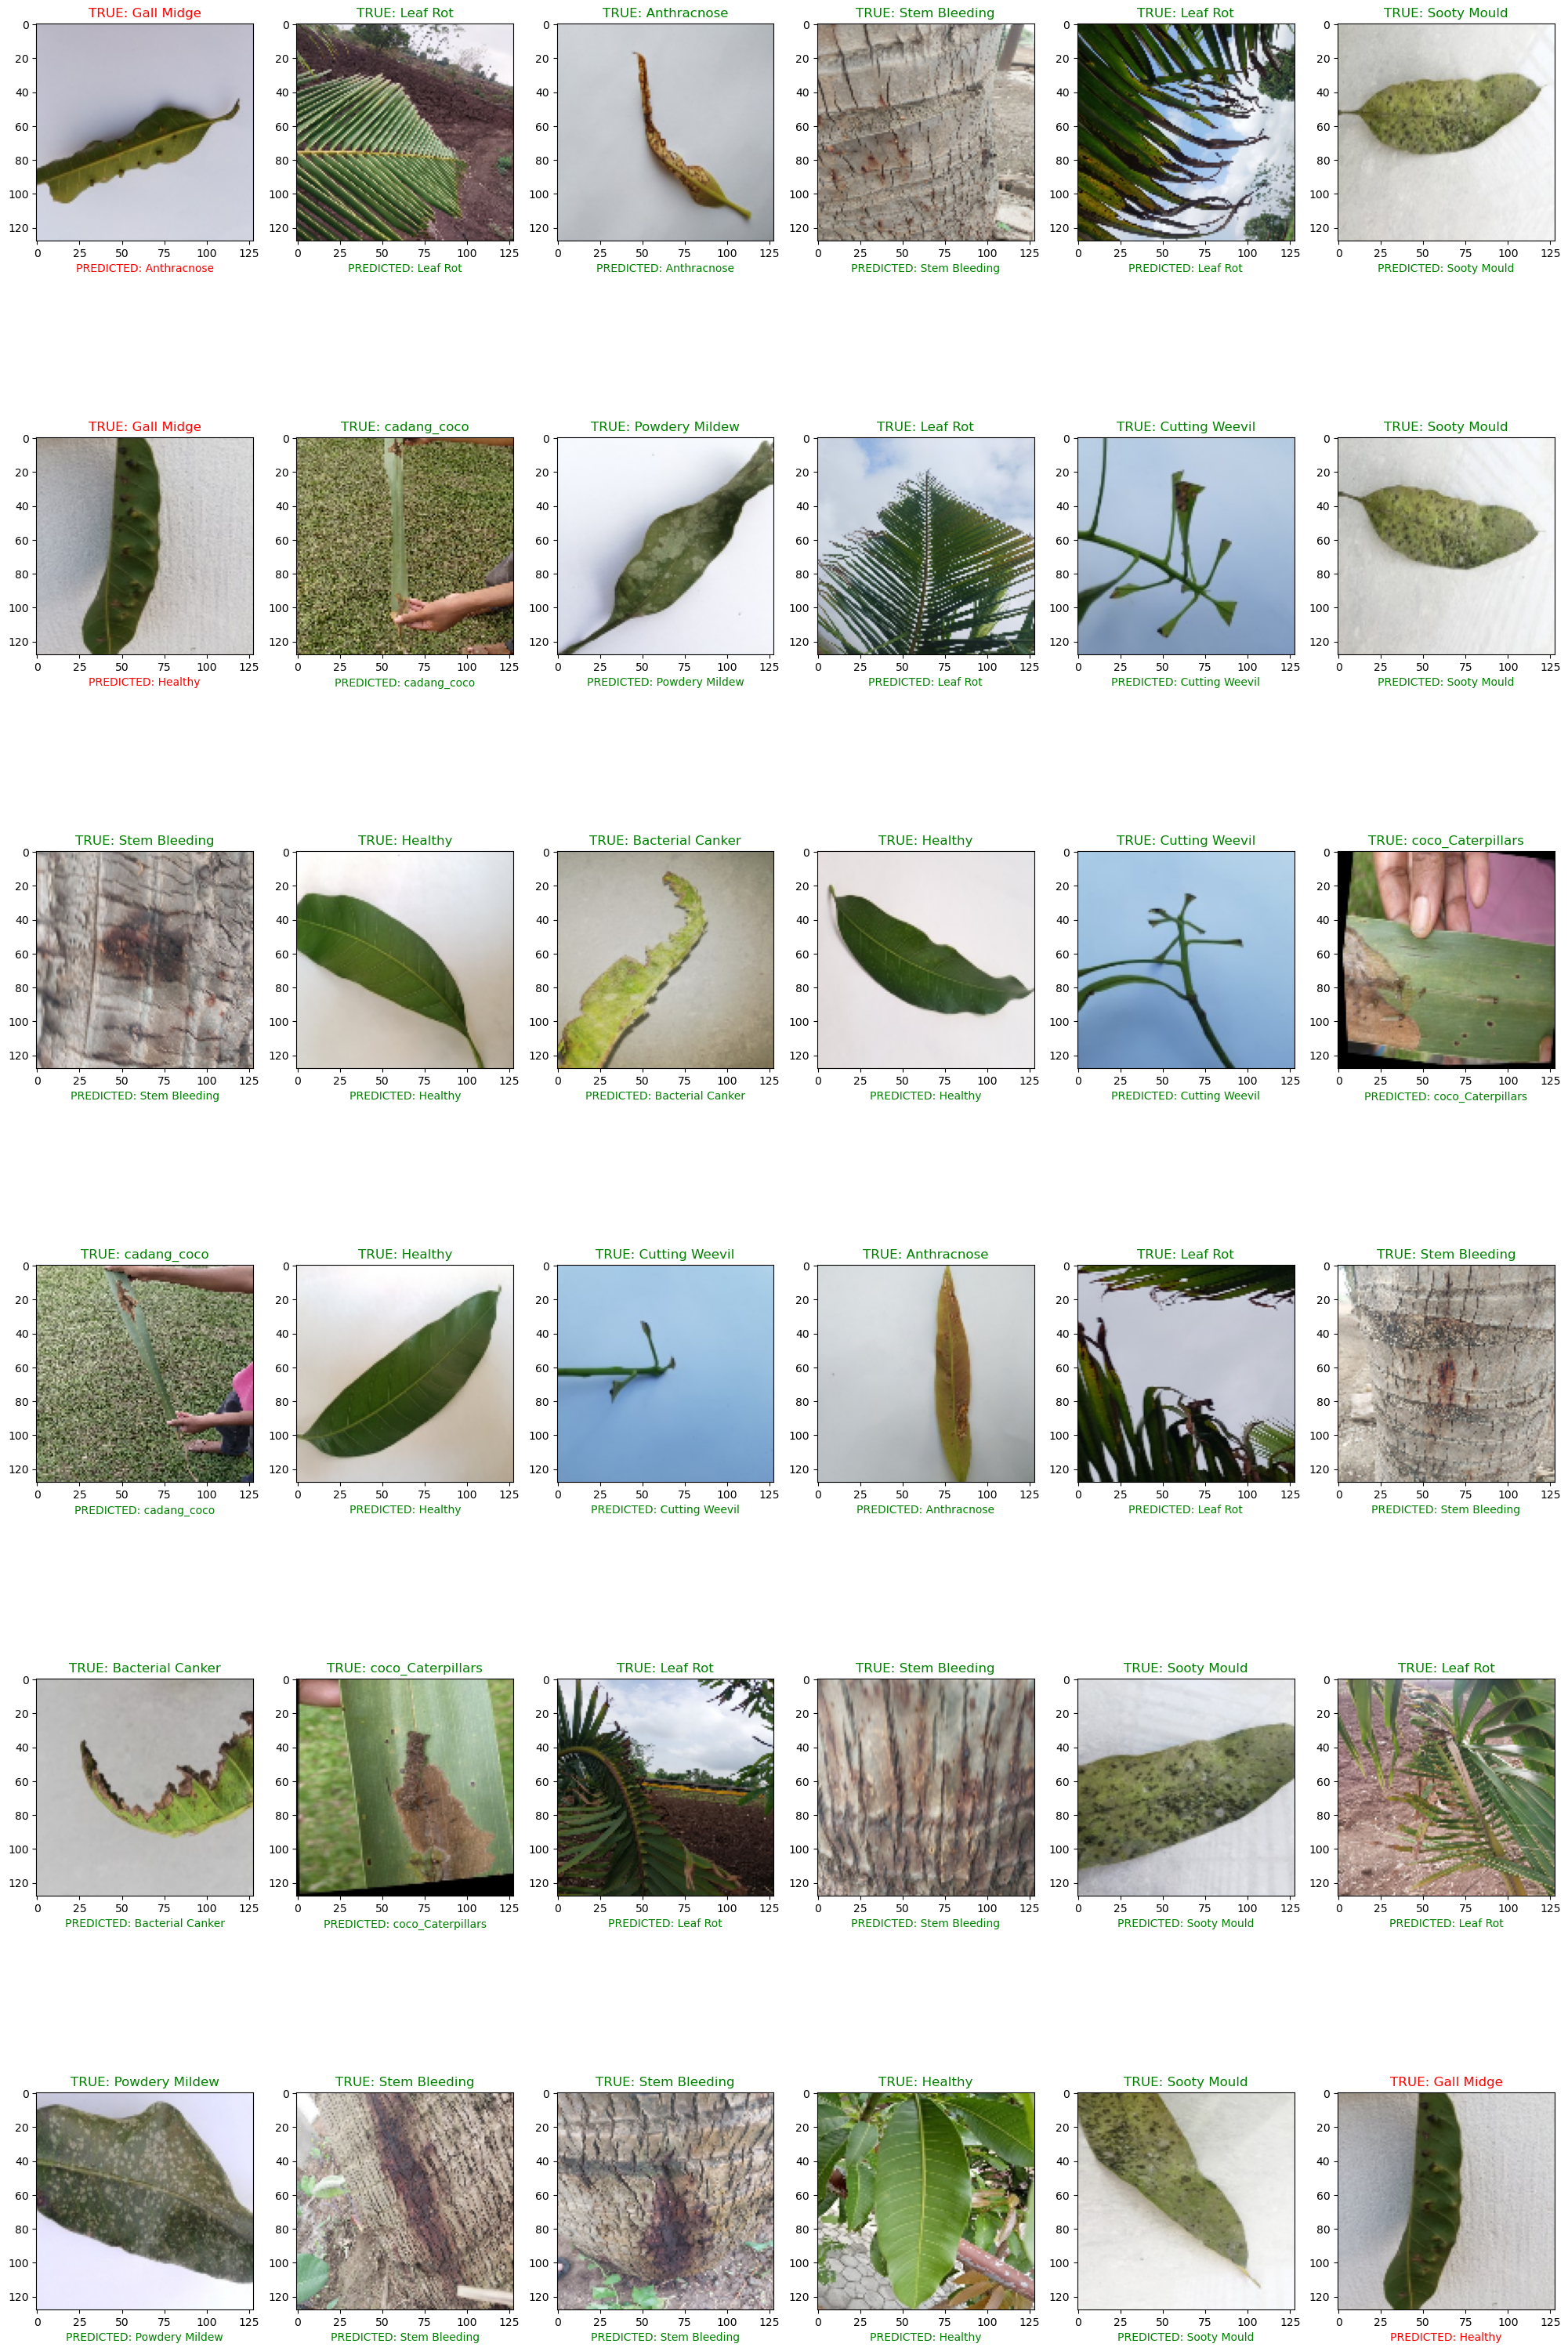

In [18]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [19]:
# save the model
model.save('model1.h5')
#the prev epoch took 304 mins 40 s
# this epoch took 304 mins 38 sec

d:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from tensorflow import lite,keras
#converter =lite.TFliteConverter.from_keras_model(model)
model=keras.models.load_model("model1.h5")
converter = lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [lite.OpsSet.TFLITE_BUILTINS, lite.OpsSet.SELECT_TF_OPS]
# Converting a SavedModel to a TensorFlow Lite model.
#converter = lite.TFLiteConverter.from_saved_model("C:\\Users\\Biancaa. R\\lumin_eye\\model1.h5")
tflite_model = converter.convert()
#converter.optimizations = [lite.Optimize.DEFAULT]
#tflite_model = converter.convert()
F=open('D://model1.tflite','wb')
F.write(tflite_model)
F.close()

In [29]:
categories = np.sort(os.listdir(folder_dir))
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="D:\\model1.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
print(input_shape)
path=r"C:\Users\Biancaa. R\rpi_disease\pest_classification\images\aulacaspis_tubercularis\Image_39.jpg"
img=cv2.imread(path)
img = np.float32(img)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=cv2.resize(img_rgb,(SIZE,SIZE))
data=[]
data.append(im)

data_arr=np.array(data)
data_arr=data_arr/255
print(len(data_arr))
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], data_arr)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print(categories[np.argmax(output_data)])

[  1 128 128   3]
1
[[2.42188380e-05 4.53943270e-04 4.14676382e-09 1.86864568e-07
  1.19993067e-03 9.94231761e-01 1.00107231e-04 1.18806965e-04
  3.74756171e-03 1.17690752e-06 8.69613189e-07 2.36139317e-06
  1.03255828e-04 5.39893863e-09 2.32325608e-08 1.47691562e-05
  2.37593838e-08 1.87404510e-08 1.16291554e-08 5.04271847e-10
  7.58829000e-10 3.99006966e-10 1.24322552e-10 1.78404392e-07
  2.13737607e-07 5.35019865e-07 5.96233729e-09 1.50668644e-10]]
Healthy


In [22]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx
import onnx


model=keras.models.load_model("model1.h5")
input_signature = [tf.TensorSpec([1, 128, 128, 3], tf.float32, name='x')]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
#opset=13: This argument specifies the ONNX operator set version to target. Operator sets define the available operations in the ONNX format. Here, version 13 is being used
onnx.save(onnx_model, "D://model1.onnx")
#[None, 128, 128, 3]: This specifies the shape of the input tensor.
#None in the first dimension indicates that the batch size can be variable.
#tf.float32: This specifies the data type of the input tensor, which is 32-bit floating-point numbers.

In [27]:
import onnxruntime as ort
import numpy as np

# Change shapes and types to match model
#input1 = np.zeros([1, 128, 128,3], np.float32)

path=r"C:\Users\Biancaa. R\rpi_disease\pest_classification\images\aulacaspis_tubercularis\Image_39.jpg"
img=cv2.imread(path)
img = np.float32(img)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=cv2.resize(img_rgb,(SIZE,SIZE))
data=[]
data.append(im)

data_arr=np.array(data)
data_arr=data_arr/255
print(len(data_arr))

# Start from ORT 1.10, ORT requires explicitly setting the providers parameter if you want to use execution providers
# other than the default CPU provider (as opposed to the previous behavior of providers getting set/registered by default
# based on the build flags) when instantiating InferenceSession.
# Following code assumes NVIDIA GPU is available, you can specify other execution providers or don't include providers parameter
# to use default CPU provider.
sess = ort.InferenceSession("D:\\model1.onnx")#, providers=["CUDAExecutionProvider"])


sess = ort.InferenceSession("D:\\model1.onnx")
model_inputs = sess.get_inputs()

for input in model_inputs:
    print(f"Input Name: {input.name}, Shape: {input.shape}")

# Set first argument of sess.run to None to use all model outputs in default order
# Input/output names are printed by the CLI and can be set with --rename-inputs and --rename-outputs
# If using the python API, names are determined from function arg names or TensorSpec names.
results_ort = sess.run(None, {"x": data_arr})
print(results_ort)


1
Input Name: x, Shape: [1, 128, 128, 3]
[array([[2.4218334e-05, 4.5393727e-04, 4.1466377e-09, 1.8686031e-07,
        1.1999182e-03, 9.9423188e-01, 1.0010630e-04, 1.1880528e-04,
        3.7475317e-03, 1.1768875e-06, 8.6959676e-07, 2.3613486e-06,
        1.0325486e-04, 5.3987841e-09, 2.3231943e-08, 1.4768947e-05,
        2.3758844e-08, 1.8739883e-08, 1.1628845e-08, 5.0425364e-10,
        7.5880596e-10, 3.9899414e-10, 1.2431807e-10, 1.7840031e-07,
        2.1373316e-07, 5.3500781e-07, 5.9621676e-09, 1.5066434e-10]],
      dtype=float32)]
